## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
#from sklearn.datasets import fetch_mldata, fetch_20newsgroups
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n = n_neighbors
        self.alg = algorithm
        self.data = None
        self.labs = None
        self.kdtree = None
    
    def fit(self, X, y):
        self.labs = y
        if self.alg=='brute':
            self.data = X
        if self.alg=='kd_tree':
            self.kdtree = KDTree(X)
    
    def predict(self, X):
        res = []
        if self.alg=='brute':
            dist = cdist(X, self.data)
            for row in dist:
                idx = np.argsort(row)[:self.n]
                labels = [self.labs[i] for i in idx]
                labs, counts = np.unique(labels, return_counts=True)
                res.append(labs[np.argmax(counts)])
        if self.alg=='kd_tree':
            index = self.kdtree.query(X, k=self.n, return_distance=False)
            for idx in index:
                labels = [self.labs[i] for i in idx]
                labs, counts = np.unique(labels, return_counts=True)
                res.append(labs[np.argmax(counts)])
        return res

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 3 ms


array([0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2])

In [11]:
%time my_clf.predict(X_test)

Wall time: 2.99 ms


[0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2]

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 1.84 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 2.89 ms


array([2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 2 ms


[2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0]

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
data_vectorized = count_vec.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
model = KNeighborsClassifier()
cross_validate(model, data_vectorized, target, cv=3)

{'fit_time': array([0.00714827, 0.00100207, 0.        ]),
 'score_time': array([1.3957417 , 1.22950912, 1.30106831]),
 'test_score': array([0.23939555, 0.22142668, 0.23760276])}

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def knn_cv(X, y):
    neib_mean = {}
    model = KNeighborsClassifier()
    for k in range(1, 11):
        model.set_params(n_neighbors = k)
        res = cross_validate(model, X, y, cv=3)
        neib_mean[k] = res['test_score'].mean()
    best = sorted(neib_mean.items(), key=lambda item: item[1], reverse=True)[0]
    return (best, neib_mean)

In [25]:
best, neib = knn_cv(data_vectorized, target)
print('Лучшее число соседей:', best[0], '\nКачество:', best[1])

Лучшее число соседей: 1 
Качество: 0.27461523586215764


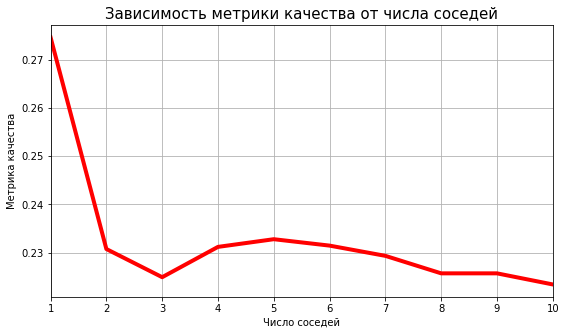

In [26]:
plt.figure(figsize=(9,5)) 
plt.title('Зависимость метрики качества от числа соседей', fontsize = 15)
plt.plot(neib.keys(), neib.values(), linewidth = 4, color = 'red')
plt.grid(True)
plt.ylabel('Метрика качества')
plt.xlabel('Число соседей')
plt.xlim(1, 10)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [27]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

normalizers = [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]

results = {}
for scaler, scaler_name in normalizers:
    data_scaled = scaler.fit_transform(data)
    for k in range(1, 11):
        for metric in ['euclidean', 'cosine']:
            model.set_params(n_neighbors=k, metric=metric)
            res = cross_validate(model, data_scaled, target, cv=3)
            results[(scaler_name, k, metric)] = res['test_score'].mean()

In [28]:
best = sorted(results.items(), key=lambda item: item[1], reverse=True)[0]
print('Лучшие параметры:', best[0])
print('Качество на кросс-валидации:', best[1])

Лучшие параметры: ('TfidfVectorizer', 10, 'cosine')
Качество на кросс-валидации: 0.644512024052135


Лучшее качество дают косинусная метрика и TfidfVectorizer.

1) В случае анализа текстов их длина не имеет большого значения, а евклидова метрика концентрируется на ней. Намного важнее рассмотреть не количество определенных токенов в тексте, а количество таких токенов относительно длины текста, что и позволяет сделать косинусная метрика. Также стоит отметить, что косинусная метрика более устойчива к выбросам.  
2) CountVectorizer учитывает только частоту каждого токена в обучающем тексте, а TfidfVectorizer не только учитывает частоту каждого токена в текущем обучающем тексте, но также учитывает количество других текстов, содержащих данный токен. Таким образом, токены, встречающиеся во многих текстах, имеют меньшее значение в TfidfVectorizer, что позволяет сконцентрироваться только на токенах, определяющих этот текст, что и влияет на качество классификации.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [29]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [30]:
test_data = newsgroups['data']
test_target = newsgroups['target']

scaler = tf_idf
scaler.fit(data)
data_scaled = scaler.transform(data)
test_data_scaled = scaler.transform(test_data)

model = KNeighborsClassifier(n_neighbors=10, metric='cosine')
model.fit(data_scaled, target)

target_pred = model.predict(test_data_scaled)
score = accuracy_score(target_pred, test_target)
print('Результат лучшей модели на test:', score)

Результат лучшей модели на test: 0.580987785448752


Качество на test ниже, чем на кросс-валидации. Это может происходить из-за разного распределения токенов в test и train и переобучения.